# Fruits 360

### A dataset of images containing fruits and vegetables

Q2. A)

Please consider the dataset fruits360 which have 21 different fruit classes. Create a Deep neural network from to classify these fruits
Consider the following points while developing the network:
1.	Parameters should not cross 20000
2.	Should not use more than 3 hidden layer (except input and output)
3.	Use optimizers like  Batch Gradient descent, mini-batch or stochastic 


In [1]:
#For faster computation we have only considered first 8 classes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import math
#Rest of the libraires will be imported, wherever necessary

In [3]:
#main datapath

In [4]:
data_path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\'

In [5]:
#ImageDataGenerator

In [6]:
from keras.preprocessing.image import ImageDataGenerator#library

In [7]:
train_datagen=ImageDataGenerator(rotation_range=30,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1./255)

In [8]:
#Creating train set

In [9]:
train_data=train_datagen.flow_from_directory(
    directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\Training\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=50,
    shuffle=True,
    seed=2)

Found 2677 images belonging to 8 classes.


In [10]:
#Creating test set

In [11]:
test_data=train_datagen.flow_from_directory(
    directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\Test\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=50,
    shuffle=True,
    seed=2)

Found 1338 images belonging to 8 classes.


In [12]:
#Creating Validation set

In [13]:
valid_data=train_datagen.flow_from_directory(
    directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\Validation\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=50,
    shuffle=True,
    seed=2)

Found 1339 images belonging to 8 classes.


In [14]:
#Model building

In [15]:
#Model 1

In [16]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Flatten ,Input

In [17]:
model1=Sequential()
model1.add(Conv2D(filters=20,kernel_size=(5,5),input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.1))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=8,activation='softmax'))

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [19]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
M1=model1.fit(train_data,batch_size=50,epochs=5,verbose=1,validation_data=valid_data,shuffle=True)

Epoch 1/5
54/54 [==============================] - 172s 2s/step - loss: 1.7764 - accuracy: 0.2760 - val_loss: 1.1306 - val_accuracy: 0.5594
Epoch 2/5
54/54 [==============================] - 58s 1s/step - loss: 1.0581 - accuracy: 0.5304 - val_loss: 0.7816 - val_accuracy: 0.7132
Epoch 3/5
54/54 [==============================] - 59s 1s/step - loss: 0.7225 - accuracy: 0.7249 - val_loss: 0.5290 - val_accuracy: 0.8245
Epoch 4/5
54/54 [==============================] - 61s 1s/step - loss: 0.5133 - accuracy: 0.8177 - val_loss: 0.4053 - val_accuracy: 0.8940
Epoch 5/5
54/54 [==============================] - 57s 1s/step - loss: 0.3669 - accuracy: 0.8758 - val_loss: 0.2524 - val_accuracy: 0.9268


In [21]:
model1.evaluate(test_data)

27/27 [==============================] - 34s 1s/step - loss: 0.2399 - accuracy: 0.9387


[0.23993228375911713, 0.9387145042419434]

In [22]:
#Performace chart

In [23]:
def plot_performance1(model):
    plt.figure(figsize=(10, 5))
    plt.plot(model.history['accuracy'], 'b', label='train_accuracy')
    plt.plot(model.history['val_accuracy'], 'y', label='validation_accuracy')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.grid(True)

In [24]:
def plot_performance2(model):
    plt.figure(figsize=(10, 5))
    plt.plot(model.history['loss'], 'b--', label='train_loss')
    plt.plot(model.history['val_loss'], 'y--', label='validation_loss')
    plt.legend()
    plt.title("Train-Validation loss vs Epochs")
    plt.grid(True)

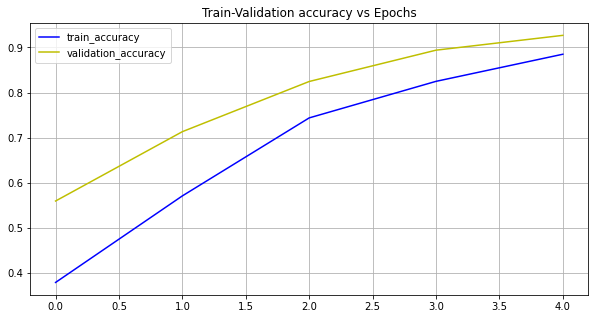

In [25]:
plot_performance1(M1)

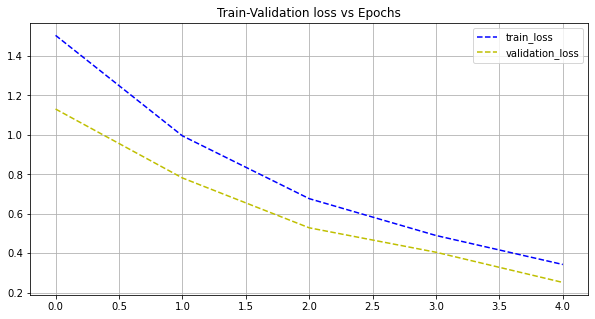

In [26]:
plot_performance2(M1)

In [27]:
#Inference:

#Train Accuracy of the model : 59%
#validation Accuracy of the model : 65%

#Train loss of the model : 1.0561
#validation loss of the model : 0.9

#Loss is little higher and there is a little bit underfitting in the model

Q2. B)

Improve the base line model by considering the following points. It is not only limited to the following
Conditions to consider:
1.	No parameter limit
2.	Can use more than 3 hidden layer (except input and output)
3.	Use any optimizers of your choice 
4.	Regularize the model


In [28]:
#Model 2

In [29]:
model2=Sequential()
model2.add(Conv2D(filters=40,kernel_size=(5,5),input_shape=(50,50,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=8,activation='softmax'))

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 40)        3040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 40)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 20)        7220      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [31]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
M2=model2.fit(train_data,batch_size=50,epochs=5,verbose=1,validation_data=valid_data,shuffle=True)

Epoch 1/5
54/54 [==============================] - 2124s 40s/step - loss: 1.6498 - accuracy: 0.3055 - val_loss: 0.9053 - val_accuracy: 0.6206
Epoch 2/5
54/54 [==============================] - 22s 417ms/step - loss: 0.8434 - accuracy: 0.6668 - val_loss: 0.5335 - val_accuracy: 0.7842
Epoch 3/5
54/54 [==============================] - 23s 430ms/step - loss: 0.5930 - accuracy: 0.7710 - val_loss: 0.3989 - val_accuracy: 0.8618
Epoch 4/5
54/54 [==============================] - 19s 352ms/step - loss: 0.3471 - accuracy: 0.8833 - val_loss: 0.2075 - val_accuracy: 0.9403
Epoch 5/5
54/54 [==============================] - 27s 495ms/step - loss: 0.2669 - accuracy: 0.9125 - val_loss: 0.1799 - val_accuracy: 0.9283


In [33]:
model2.evaluate(test_data)

27/27 [==============================] - 21s 771ms/step - loss: 0.1919 - accuracy: 0.9275


[0.1918814778327942, 0.927503764629364]

In [34]:
#Performace chart

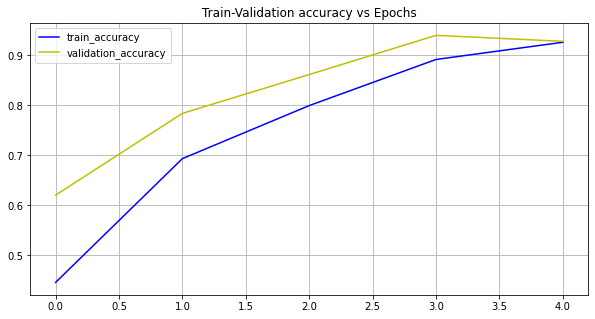

In [35]:
plot_performance1(M2)

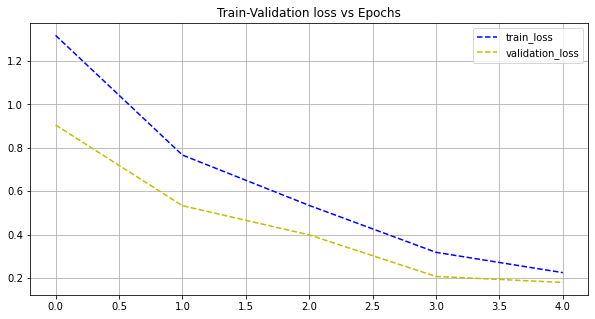

In [36]:
plot_performance2(M2)

In [37]:
#Inference:

#Train Accuracy of the model : 62%
#validation Accuracy of the model : 67%

#Train loss of the model : 0.94
#validation loss of the model : 0.83

#with respect to the previous model the loss had decreased a little

In [38]:
#Regularization

In [39]:
#Creating a model with learning rate and lambda values 

In [40]:
from tensorflow.keras import regularizers, optimizers

In [41]:
lr = 1e5
Lambda = 1e-8

In [42]:
model3=Sequential()
model3.add(Conv2D(filters=15,kernel_size=(5,5),input_shape=(50,50,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=5,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(units=64,activation='relu'))
model3.add(Dense(units=8,activation='softmax',kernel_regularizer=regularizers.l2(Lambda)))
    
#sgd=optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9,name="SGD")
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(train_data,batch_size=50,epochs=10,verbose=1,validation_data=valid_data,shuffle=True)
#score = model3.evaluate(train_data, verbose=0)
#return score

Epoch 1/10
54/54 [==============================] - 64s 1s/step - loss: 1.8923 - accuracy: 0.2323 - val_loss: 1.1290 - val_accuracy: 0.5071
Epoch 2/10
54/54 [==============================] - 61s 1s/step - loss: 1.1150 - accuracy: 0.5109 - val_loss: 0.9279 - val_accuracy: 0.5579
Epoch 3/10
54/54 [==============================] - 63s 1s/step - loss: 0.8569 - accuracy: 0.6263 - val_loss: 0.6925 - val_accuracy: 0.6990
Epoch 4/10
54/54 [==============================] - 57s 1s/step - loss: 0.7204 - accuracy: 0.6982 - val_loss: 0.5464 - val_accuracy: 0.7864
Epoch 5/10
54/54 [==============================] - 58s 1s/step - loss: 0.6198 - accuracy: 0.7522 - val_loss: 0.4591 - val_accuracy: 0.8297
Epoch 6/10
54/54 [==============================] - 60s 1s/step - loss: 0.5304 - accuracy: 0.7863 - val_loss: 0.3380 - val_accuracy: 0.9052
Epoch 7/10
54/54 [==============================] - 58s 1s/step - loss: 0.3967 - accuracy: 0.8552 - val_loss: 0.2924 - val_accuracy: 0.9171
Epoch 8/10
54/54 [==

In [43]:
model3.evaluate(test_data)

27/27 [==============================] - 26s 959ms/step - loss: 0.1956 - accuracy: 0.9387


[0.19560442864894867, 0.9387145042419434]

In [44]:
#After Requlization we have got a better model

#Inference:

#Train Accuracy of the model : 70%
#validation Accuracy of the model : 76%

#Train loss of the model : 0.773
#validation loss of the model : 0.611

#with respect to the previous model the loss had decreased a little

Q2. C)Please save the model weights with .h5 extension.

In [45]:
#model_json = model3.to_json()
#with open("model_final.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model3.save_weights("model3.h5")

In [46]:
model3.save('fruits_model3_weights.hdf5')

Q3. A)Please load the saved weights and perform the classification on the test image.

In [47]:
from keras.models import load_model

In [48]:
model_load=load_model('fruits_model3_weights.hdf5')

In [49]:
model_load.evaluate(test_data)

27/27 [==============================] - 42s 1s/step - loss: 0.1715 - accuracy: 0.9439


[0.17151273787021637, 0.9439461827278137]

In [50]:
#Model Prediction on test image (random images)

In [51]:
from PIL import Image
from skimage import transform

In [52]:
image_path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\Test\\apple_crimson_snow\\175.jpg'
image1=Image.open(image_path)
#image1.show()
np_image=np.array(image1).astype('float32')/255
np_image=transform.resize(np_image,(50,50,3))
np_image=np.expand_dims(np_image,axis=0)

In [53]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [54]:
testing_dataset=image_dataset_from_directory(directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sample paper\\Fruits_DataSet_8Classes\\fruits-360-original-size\\Test\\')

Found 1338 files belonging to 8 classes.


In [55]:
class_name =  testing_dataset.class_names
label=model_load.predict(np_image)
print("Predicted Class:",class_name[label.argmax()])

Predicted Class: apple_crimson_snow


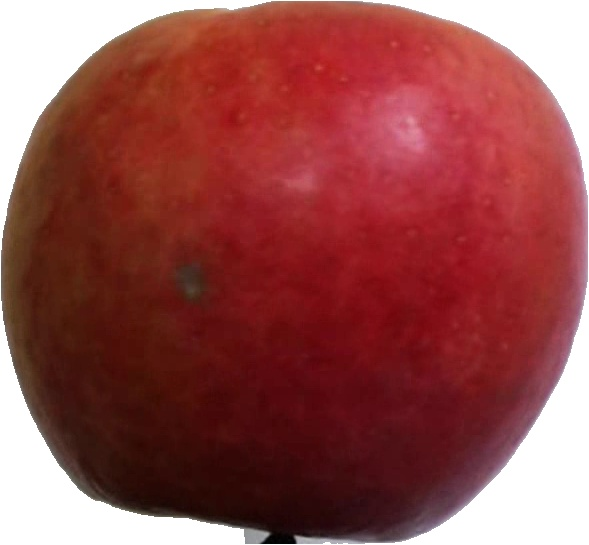

In [56]:
from IPython.display import Image
Image(image_path)

Q3. B)Use Transfer learning approach  to perform this fruit data classification. 

In [90]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(50,50,3),pooling='avg')

58900480/58889256 [==============================] - 25s 0us/step


In [53]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [101]:
X=vgg.output# get the output from the loaded model
X = Dense(units=64,activation='relu')(X)
X = Dense(units=8,activation='softmax')(X)
Model_pretrained=Model(vgg.input,X)

In [102]:
Model_pretrained.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [103]:
Model_pretrained.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
M4=Model_pretrained.fit(train_data,batch_size=10,epochs=3,verbose=1,validation_data=valid_data,shuffle=True)

Epoch 1/3
54/54 [==============================] - 354s 7s/step - loss: 1.7992 - accuracy: 0.2264 - val_loss: 1.3480 - val_accuracy: 0.3674
Epoch 2/3
54/54 [==============================] - 305s 6s/step - loss: 1.1800 - accuracy: 0.4505 - val_loss: 0.9267 - val_accuracy: 0.5213
Epoch 3/3
54/54 [==============================] - 304s 6s/step - loss: 0.9174 - accuracy: 0.5517 - val_loss: 0.8937 - val_accuracy: 0.5579


In [106]:
Model_pretrained.evaluate(test_data)

27/27 [==============================] - 63s 2s/step - loss: 0.8939 - accuracy: 0.5471


[0.8939334154129028, 0.5470852255821228]

In [ ]:
#Performace chart

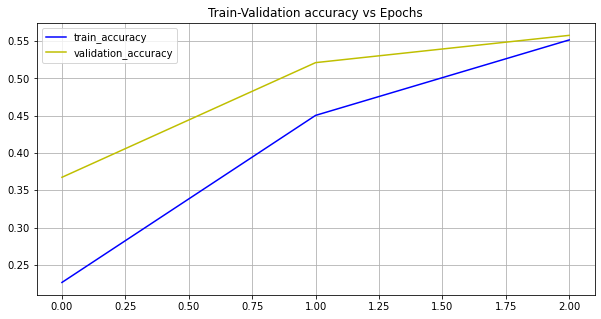

In [107]:
plot_performance1(M4)

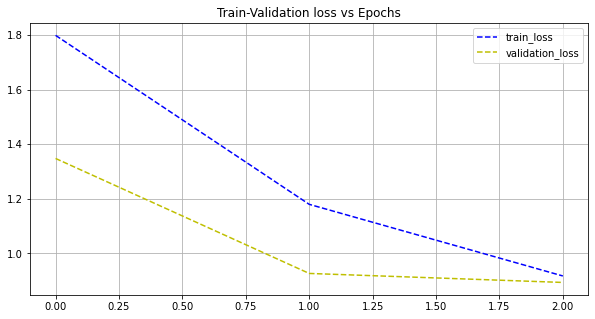

In [109]:
plot_performance2(M4)

In [ ]:
#-----------------------------------------END--------------------------------------------------------------#